# Занятие 3
# Прикладная алгебра и численные методы
## Метод наименьших квадратов, линейная регрессия
numpy:
https://numpy.org/doc/stable/reference/routines.linalg.html

scipy:
https://docs.scipy.org/doc/scipy/reference/linalg.html

In [1]:
import numpy as np
import scipy.linalg
import sympy
import matplotlib.pyplot as plt
%matplotlib inline

## Метод наименьших квадратов
Решим с помощью МНК СЛАУ
## Пример 1
$$
\left\{
\begin{matrix}
x + 3y = 6\\
3x + 9y = 3
\end{matrix}
\right.
$$
Вначале построим графики прямых, соответствующих уравнениям системы:

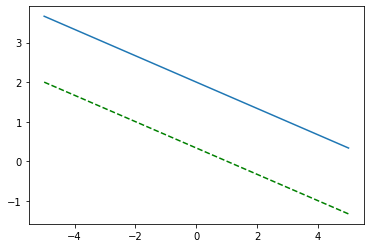

In [2]:
x, y = sympy.symbols('x y')

A = np.array([[1, 3], [3, 9]])
b = np.array([[6], [3]])
X = [-5, 5]
Y1, Y2 = [[(b[i] - A[i, 0]*x)/A[i, 1] for x in X] for i in (0, 1)]
plt.plot(X, Y1)
plt.plot(X, Y2, 'g--')

Прямые параллельны, поскольку коэффициенты при переменных пропорциональны, проверим это:

In [3]:
A[0, 0]/A[1, 0] == A[0, 1]/A[1, 1]

True

Найдем псевдорешение с помощью псевдообратной матрицы:

In [4]:
sol = np.matmul(np.linalg.pinv(A), b)
sol

array([[0.15],
       [0.45]])

Отметим на графике точку, соответствующую псевдорешению:

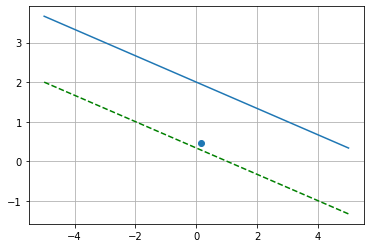

In [5]:
plt.plot(X, Y1)
plt.plot(X, Y2, 'g--')
plt.scatter(*sol)
plt.grid(True)

Сравним длину невязки для псевдорешения и для (0, 1) и (0, 1/3), для этого сначала опишем длину невязки в виде функции (будем находить длину вектора как норму, по умолчанию норма евклидова):

In [6]:
def residual(A, b, sol):
    return np.linalg.norm(np.matmul(A, sol) - b)

Сравним длину невязки для псевдорешения и для (0, 1) и (0, 1/3):

In [7]:
residual(A, b, sol), residual(A, b, np.array([[1], [1]])), residual(A, b, np.array([[0], [1/3]]))

(4.743416490252569, 9.219544457292887, 5.0)

Построим график зависимости невязки от координат $x$ и $y$ вектора в диапазоне (-0.5, 1):

(0.0, 20.0)

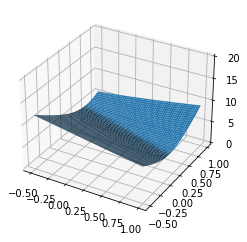

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-0.5, 1.0, 0.01)
xlen = len(X)
Y = np.arange(-0.5, 1.0, 0.01)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.empty(X.shape)
for i in range(ylen):
    for j in range(xlen):
        Z[i, j] = residual(A, b, np.array([[X[i, j]], [Y[i, j]]]))
ax.plot_surface(X, Y, Z)
ax.set_zlim(0, 20)

Отметим маркером на графике точку, соответствующую псевдорешению:

4.743416490252569

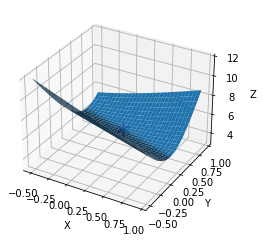

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-0.5, 1.0, 0.05)
xlen = len(X)
Y = np.arange(-0.5, 1.0, 0.05)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.empty(X.shape)
for i in range(ylen):
    for j in range(xlen):
        vect = np.array([[X[i, j]], [Y[i, j]]])
        Z[i, j] = residual(A, b, vect)
ax.plot_surface(X, Y, Z)
ax.set_zlim(3, 12)
ax.scatter(*sol, residual(A, b, sol), c=8, s=150, marker=(6, 2))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
min([min(zz) for zz in Z])

По графику неясно, что в точке, соответствующей псевдорешению, невязка имеет минимум.
Найдем минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне (-0.5, 1):

In [10]:
min_res = min([min(zz) for zz in Z])
min_res, residual(A, b, sol) == min_res

(4.743416490252569, True)

## Линейная регрессия
Даны значения некоторой величины $Q$:
$$
1.325, 0.997, 1.001, 1.126, 0.835, 1.131, 0.916
$$
полученные в моменты времени $t$
$$
1, 2, 3, 5, 6, 7, 9
$$

Найти коэффициенты $k$ и $b$ линейной регрессии $Q = kt+b$.

Составим матрицу $A$, первый столбец которой образуют значения моментов времени, второй столбец - единицы.
Также составим матрицу-столбец $Q$ из значений $Q$,
тогда
$$
\left[\begin{matrix}k\\b\end{matrix}\right] = A^+Q
$$

In [11]:
Av = np.array([1, 2, 3, 5, 6, 7, 9])
nA = len(Av)
A = np.reshape(Av, (nA, 1))
A1 = np.hstack((A, np.ones((nA, 1))))
Qv = np.array([1.325, 0.997, 1.001, 1.126, 0.835, 1.131, 0.916])
Q = np.reshape(Qv, (nA, 1))
res = np.matmul(np.linalg.pinv(A1), Q)
k, b = res[:, 0]
display('A', A, 'A1', A1, 'Q', Q, 'k', k, 'b', b)

'A'

array([[1],
       [2],
       [3],
       [5],
       [6],
       [7],
       [9]])

'A1'

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [9., 1.]])

'Q'

array([[1.325],
       [0.997],
       [1.001],
       [1.126],
       [0.835],
       [1.131],
       [0.916]])

'k'

-0.02908092485549138

'b'

1.1843815028901736

Изобразим на графике линию регрессии и точки:

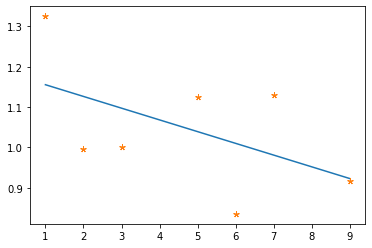

In [12]:
X = np.array([min(Av), max(Av)])
Y = k*X + b
plt.plot(X, Y)
plt.plot(Av, Qv, ' ', marker=(5, 2))

## Украшение графика
Для повышения информативности и для красоты можно на графике:

###  вывести легенду legend

### вывести подписи к осям xlabel, ylabel

### изменить засечки на осях и подписи к ним xticks, yticks

### использовать в легенде формулы Latex

### вывести название title

### вывести линии сетки grid

### соотношение масштабов по осям сделать одинаковым или каким-то определенным

### много еще чего можно, 
читайте документацию:

https://matplotlib.org/

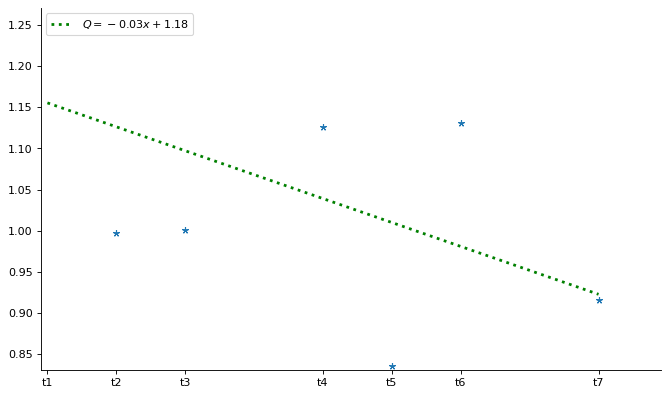

In [13]:
#Изменяем цвет, тип и толщину линии, ставим метку для легенды 
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, Y, color="green", linewidth=2.5, linestyle=":", label=r'$Q = {k}x + {b}$'.format(k=k.round(2), b=b.round(2)))
plt.plot(Av, Qv, ' ', marker=(5, 2))
#ограничения по осям
plt.xlim(X.min() * 0.9, X.max() * 1.1)
plt.ylim(Y.min() * 0.9, Y.max() * 1.1)
#Подписи к осям

#засечки на осях и подписи к засечкам на осях
xtick_names = ['t' + str(i + 1) for i, item in enumerate(Av)]
ytick_names = [item.round(1) for item in Qv]
plt.xticks(Av, xtick_names)
#Перенос осей координат:
ax = plt.gca()  # gca = 'get current axis' получаем доступ к текущей системе координат
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0.9*min(Y)))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0.9*min(X)))
#Добавляем легенду
plt.legend(loc='upper left')

## Чтение из файла с pandas
Нам понадобится для работы с реальными данными брать данные из файла, а не перенабирать их вручную. 
Данные, которые нам понядобятся для МНК и регрессионного анализа обычно храятся в файле .xlsx или .csv.
Работать с данными, записанными в файлы такого типа, будем с помощью пакета pandas,
в нем нам понадобятся функции
### pandas.read_csv
### pandas.read_excel
pandas.read_csv(filepath_or_buffer, sep=object object, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None)

pandas.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True, storage_options=None)

Подробности смотрите здесь:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [14]:
import pandas as pd

In [15]:
res = pd.read_csv('d:\HSE\Algebra_minor2021\Data\sem3_corona2020.csv', delimiter=';',
                  skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
res[:5]

,A,1,2,3,4,5,6
0,Российская Федерация,7444,5644,1800,5008,1530.0,3478
1,Центральный федеральный округ,4994,3760,1234,3268,1127.0,2141
2,Белгородская область,26,24,2,14,4.0,10
3,Брянская область,20,20,0,129,10.0,119
4,Владимирская область,35,35,0,0,0.0,0


Можно считать только столбец с названиями областей:

In [16]:
names = pd.read_csv('d:\HSE\Algebra_minor2021\Data\sem3_corona2020.csv', delimiter=';', usecols=[0], skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
names[:5]

,A
0,Российская Федерация
1,Центральный федеральный округ
2,Белгородская область
3,Брянская область
4,Владимирская область


In [17]:
total = pd.read_csv('d:\HSE\Algebra_minor2021\Data\sem3_corona2020.csv', delimiter=';',
                    usecols=[1], skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
total[:5]

,1
0,7444
1,4994
2,26
3,20
4,35


Считаем несколько столбцов:

In [18]:
q = pd.read_csv('d:\HSE\Algebra_minor2021\Data\sem3_corona2020.csv', delimiter=';',
                    usecols=[0, 3], skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
q[:5]

,A,3
0,Российская Федерация,1800
1,Центральный федеральный округ,1234
2,Белгородская область,2
3,Брянская область,0
4,Владимирская область,0


### Работа с данными, извлеченными из csv
read_csv и read_excel возвращают данные типа pandas.core.frame.DataFrame:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [19]:
type(q)

pandas.core.frame.DataFrame

## Основные средства работы с pandas.core.frame.DataFrame
#### DataFrame.index 
The index (row labels) of the DataFrame.

Метки строк (например, номера строк)
#### DataFrame.columns 
The column labels of the DataFrame.
Метки столбцов (например, названия столбцов, если есть)
#### DataFrame.values 
Return a Numpy representation of the DataFrame.

Возвращает array с данными из DataFrame
#### DataFrame.axes 
Return a list representing the axes of the DataFrame.

Возвращает список list осей DataFrame
#### DataFrame.ndim 
Return an int representing the number of axes / array dimensions.

Возвращает число осей DataFrame, т.е. размерности массива
#### DataFrame.size 
Return an int representing the number of elements in this object.

Возвращает число элементов в объекте
#### DataFrame.shape 
Return a tuple representing the dimensionality of the DataFrame.

Возвращает  tuple, описывающий размерности DataFrame
#### DataFrame.empty 
Indicator whether DataFrame is empty.
Показатель того, пусто ли DataFrame или нет.

In [20]:
qq5 = q[:5]
display(q.index, q.columns, qq5.values, q.axes, q.ndim, qq5.size, q.shape, q.empty)        

RangeIndex(start=0, stop=96, step=1)

Index(['A', '3'], dtype='object')

array([['   Российская Федерация', 1800],
       ['  Центральный федеральный округ', 1234],
       ['Белгородская область', 2],
       ['Брянская область', 0],
       ['Владимирская область', 0]], dtype=object)

[RangeIndex(start=0, stop=96, step=1), Index(['A', '3'], dtype='object')]

2

10

(96, 2)

False

## Немного о read_excel
Считаем данные из файла sem3_corona2020.xlsx, выделим строки с 5 до 10 (не включая 10) и выведем на экран некоторые характеристики полученных DataFrame.

In [21]:
rexcel = pd.read_excel('d:\HSE\Algebra_minor2021\Data\sem3_corona2020.xlsx', index_col=0,
              dtype={'Name': str, 'Value': int}) 

In [22]:
rexcel[:10]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
СВЕДЕНИЯ О ЧИСЛЕ ЗАРЕГИСТРИРОВАННЫХ УМЕРШИХ С УСТАНОВЛЕННЫМ ДИАГНОЗОМ КОРОНАВИРУСНОЙ ИНФЕКЦИИ1) за май 2020 года,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Основная причина смерти,NaN,NaN,Причина смерти отнесена к прочим важным состоя...,NaN,NaN
NaN,Всего,в том числе:,NaN,Всего,в том числе:,NaN
NaN,NaN,"COVID-19, вирус идентифицирован","возможно, COVID-19, вирус не идентифицирован",NaN,"COVID-19 не является основной причиной смерти,...",COVID-19 не является основной причиной смерти ...
A,1,2,3,4,5,6
Российская Федерация,7444,5644,1800,5008,1530,3478
Центральный федеральный округ,4994,3760,1234,3268,1127,2141
Белгородская область,26,24,2,14,4,10


In [23]:
rexcel10 = rexcel[5:10]
display(rexcel10.index, rexcel10.columns, rexcel10.values, rexcel10.axes, 
        rexcel.ndim, rexcel.size, rexcel.shape, rexcel.empty)        

Index(['A', '   Российская Федерация', '  Центральный федеральный округ',
       'Белгородская область', 'Брянская область'],
      dtype='object', name='СВЕДЕНИЯ О ЧИСЛЕ ЗАРЕГИСТРИРОВАННЫХ УМЕРШИХ С УСТАНОВЛЕННЫМ ДИАГНОЗОМ КОРОНАВИРУСНОЙ ИНФЕКЦИИ1)\nза  май 2020 года ')

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

array([[1, 2, 3, 4, 5, 6],
       [7444, 5644, 1800, 5008, 1530, 3478],
       [4994, 3760, 1234, 3268, 1127, 2141],
       [26, 24, 2, 14, 4, 10],
       [20, 20, 0, 129, 10, 119]], dtype=object)

[Index(['A', '   Российская Федерация', '  Центральный федеральный округ',
        'Белгородская область', 'Брянская область'],
       dtype='object', name='СВЕДЕНИЯ О ЧИСЛЕ ЗАРЕГИСТРИРОВАННЫХ УМЕРШИХ С УСТАНОВЛЕННЫМ ДИАГНОЗОМ КОРОНАВИРУСНОЙ ИНФЕКЦИИ1)\nза  май 2020 года '),
 Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
        'Unnamed: 6'],
       dtype='object')]

2

624

(104, 6)

False